### 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)  # para ver todas las columnas

### 2. Loading DataSet

In [2]:
df_nov = pd.read_csv('../data/ontime_nov_2024.csv')
df_dec = pd.read_csv('../data/ontime_dec_2024.csv')
df_jan = pd.read_csv('../data/ontime_jan_2025.csv')
df_feb = pd.read_csv('../data/ontime_february_2025.csv')
df_mar = pd.read_csv('../data/ontime_march_2025.csv')
df_apr = pd.read_csv('../data/ontime_april_2025.csv')
df_may = pd.read_csv('../data/ontime_may_2025.csv')
df_jun = pd.read_csv('../data/ontime_june_2025.csv')
df_jul = pd.read_csv('../data/ontime_july_2025.csv')
df_aug = pd.read_csv('../data/ontime_august_2025.csv')
df_sept = pd.read_csv('../data/ontime_sept_2025.csv')
df_oct = pd.read_csv('../data/ontime_oct_2025.csv')

/var/folders/lr/d46q9z0s2zndy_5npx2_zwq00000gn/T/ipykernel_23863/4169946023.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dec = pd.read_csv('../data/ontime_dec_2024.csv')


### 3. Merging all Dataset

We have 12 different Datasets, from November 2024 to October 2025. I'm going to merge them so I can work with all of them at the same time, and also comparte delayed flight by season. 

In [3]:
df_airlines = pd.concat([df_nov, df_dec, df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sept, df_oct], ignore_index=True)
df_airlines.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY
0,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4800,CLT,"Charlotte, NC",NC,LGA,"New York, NY",NY,1828.0,52.0,1.0,2015.0,36.0,1.0,0.0,NaN,6.0,0.0,0.0,0.0
1,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4801,CVG,"Cincinnati, OH",KY,DTW,"Detroit, MI",MI,1741.0,0.0,0.0,1849.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4802,DSM,"Des Moines, IA",IA,MSP,"Minneapolis, MN",MN,1554.0,0.0,0.0,1657.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4803,CVG,"Cincinnati, OH",KY,DTW,"Detroit, MI",MI,1350.0,0.0,0.0,1455.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4804,GSP,"Greer, SC",SC,LGA,"New York, NY",NY,1245.0,0.0,0.0,1435.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


DataSets from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS).


Columns description:

- **year:** Year of the flight.
- **month:** Month of the flight.
- **day_of_month:** Day of the month on which the flight occurred.
- **day_of_week:** Day of the week on which the flight occurred.
- **fl_date:** Full calendar date of the flight (YYYY-MM-DD).
- **OP_unique_carrier:** Unique carrier code reported by the airline. When the same code has been used by multiple carriers over time, a numeric suffix is added for earlier users (e.g., PA, PA(1), PA(2)). This field should be used for analysis across multiple years.
- **OP_carrier_airline_id** Unique identification number assigned by the U.S. Department of Transportation (DOT) to each airline. A unique airline is defined as one operating under the same DOT certificate, regardless of its code, name, or holding company.
- **flight_number:** Airline-assigned flight number.
- **origin** IATA airport code of the departure airport.
- **origin_city_name:** City of the departure airport.
- **origin_state_abr:** U.S. state of the departure airport.
- **dest:** IATA airport code of the arrival airport.
- **dest_city_name:** City of the arrival airport.
- **dest_state_abr:** U.S. state of the arrival airport.
- **dep_time:** Actual departure time (local time, hhmm).
- **dep_delay_new:** Difference, in minutes, between scheduled and actual departure time. Early departures are represented by negative values.
- **dep_del15:** Departure delay indicator: 1 if the departure delay is 15 minutes or more, 0 otherwise.
- **arr_time:** Actual arrival time (local time, hhmm).
- **arr_delay_new:** Difference, in minutes, between scheduled and actual arrival time. Early arrivals are set to 0.
- **arr_del15:** Arrival delay indicator: 1 if the arrival delay is 15 minutes or more, 0 otherwise.
- **cancelled:** Cancelled Flight Indicator (1=Yes).	
- **cancellation_code:** Specifies The Reason For Cancellation (A = Carrier, B= Weather, C= National Air System, D= Security, E = No Cancellation).
- **carrier_delay:** Carrier Delay, in Minutes.	
- **weather_delay:** Weather Delay, in Minutes.	
- **nas_delay:** National Air System Delay, in Minutes.	
- **security_delay:** Security Delay, in Minutes.

Checking the shape of the DataFrame

In [4]:
df_airlines.shape

(7014750, 26)

### 4. Cleaning names of columns

In [5]:
# df_airlines.columns = df_airlines.columns.str.strip().str.lower().str.replace(" ", "_")

In [6]:
df_airlines.columns = (
    df_airlines.columns
      .str.lower()
      .str.normalize('NFKD')      
      .str.encode('ascii', errors='ignore')
      .str.decode('utf-8')
      .str.replace(' ', '_')
      .str.replace('[^0-9a-zA-Z_]', '')
)
df_airlines.head(5)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_airline_id,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,dest,dest_city_name,dest_state_abr,dep_time,dep_delay_new,dep_del15,arr_time,arr_delay_new,arr_del15,cancelled,cancellation_code,carrier_delay,weather_delay,nas_delay,security_delay
0,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4800,CLT,"Charlotte, NC",NC,LGA,"New York, NY",NY,1828.0,52.0,1.0,2015.0,36.0,1.0,0.0,NaN,6.0,0.0,0.0,0.0
1,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4801,CVG,"Cincinnati, OH",KY,DTW,"Detroit, MI",MI,1741.0,0.0,0.0,1849.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4802,DSM,"Des Moines, IA",IA,MSP,"Minneapolis, MN",MN,1554.0,0.0,0.0,1657.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4803,CVG,"Cincinnati, OH",KY,DTW,"Detroit, MI",MI,1350.0,0.0,0.0,1455.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2024,11,1,5,11/1/2024 12:00:00 AM,9E,20363,4804,GSP,"Greer, SC",SC,LGA,"New York, NY",NY,1245.0,0.0,0.0,1435.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


### 5. Cleaning Data

Before analysis, we check:

- Missing values
- Incorrect data types
- Duplicates

Dropping fl_date, because we already have columns: year, month, day.

In [7]:
df_airlines = df_airlines.drop(columns = ["fl_date"])

Checking data types:

In [8]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7014750 entries, 0 to 7014749
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   year                   int64  
 1   month                  int64  
 2   day_of_month           int64  
 3   day_of_week            int64  
 4   op_unique_carrier      object 
 5   op_carrier_airline_id  int64  
 6   op_carrier_fl_num      int64  
 7   origin                 object 
 8   origin_city_name       object 
 9   origin_state_abr       object 
 10  dest                   object 
 11  dest_city_name         object 
 12  dest_state_abr         object 
 13  dep_time               float64
 14  dep_delay_new          float64
 15  dep_del15              float64
 16  arr_time               float64
 17  arr_delay_new          float64
 18  arr_del15              float64
 19  cancelled              float64
 20  cancellation_code      object 
 21  carrier_delay          float64
 22  weather_delay     

Convert dep_time and arr_time to datetime:

*dep_time*: 

In [9]:
df_airlines['dep_time'] = (
    df_airlines['dep_time']
    .fillna(0)
    .astype(int)
    .astype(str)
    .str.zfill(4)
)

In [10]:
df_airlines['dep_time_dt'] = pd.to_datetime(
    df_airlines['dep_time'],
    format='%H%M',
    errors='coerce'
)

In [11]:
df_airlines['dep_time'] = df_airlines['dep_time_dt'].dt.time

*arr_time:*

In [12]:
df_airlines['arr_time'] = (
    df_airlines['arr_time']
    .fillna(0)
    .astype(int)
    .astype(str)
    .str.zfill(4)
)

df_airlines['arr_time_dt'] = pd.to_datetime(
    df_airlines['arr_time'],
    format='%H%M',
    errors='coerce'
)

df_airlines['arr_time'] = df_airlines['arr_time_dt'].dt.time

Create new columns with timeslots bins for dep_time: 

- Late Night: 00:00 – 04:59
- Early Morning: 05:00 – 07:59
- Late Morning: 08:00 – 10:59
- Midday: 11:00 – 13:59
- Afternoon: 14:00 – 17:59
- Early Evening: 18:00 – 20:59
- Night: 21:00 – 23:59

In [13]:
bins = pd.to_datetime([
    '1900-01-01 00:00',
    '1900-01-01 05:00',
    '1900-01-01 08:00',
    '1900-01-01 11:00',
    '1900-01-01 14:00',
    '1900-01-01 18:00',
    '1900-01-01 21:00',
    '1900-01-02 00:00'])

labels = [
    'Late Night',      # 00:00–04:59
    'Early Morning',   # 05:00–07:59
    'Late Morning',    # 08:00–10:59
    'Midday',          # 11:00–13:59
    'Afternoon',       # 14:00–17:59
    'Early Evening',   # 18:00–20:59
    'Night'            # 21:00–23:59
]

In [14]:
df_airlines['dep_bin'] = pd.cut(
    df_airlines['dep_time_dt'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

Also making, new column with season bins for months: 

- Winter: 12, 1, 2
- Spring: 3, 4, 5
- Summer: 6, 7, 8
- Autumn: 9, 10, 11

In [15]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_airlines['season'] = df_airlines['month'].apply(get_season)

Creating delay categories: 

- On-Time Delay: <= 0 
- Minor Delay: between 1 minute and 14
- Moderate Delay: between 15 and 59 minutes
- Severe Delay: >= 60 minutes
- Cancelled

In [16]:
def delay_category_with_cancel(row):
    if row['cancelled'] == 1:
        return 'Cancelled'
    elif row['dep_delay_new'] <= 0:
        return 'On Time'
    elif row['dep_delay_new'] < 15:
        return 'Minor Delay'
    elif row['dep_delay_new'] < 60:
        return 'Moderate Delay'
    else:
        return 'Severe Delay'

df_airlines['delay_category'] = df_airlines.apply(delay_category_with_cancel, axis=1)

Checking missing values:

In [17]:
df_airlines.isnull().sum()

year                           0
month                          0
day_of_month                   0
day_of_week                    0
op_unique_carrier              0
op_carrier_airline_id          0
op_carrier_fl_num              0
origin                         0
origin_city_name               0
origin_state_abr               0
dest                           0
dest_city_name                 0
dest_state_abr                 0
dep_time                     731
dep_delay_new              82456
dep_del15                  82456
arr_time                    3688
arr_delay_new             105721
arr_del15                 105721
cancelled                      0
cancellation_code        6928290
carrier_delay            5539774
weather_delay            5539774
nas_delay                5539774
security_delay           5539774
dep_time_dt                  731
arr_time_dt                 3688
dep_bin                      731
season                         0
delay_category                 0
dtype: int

*cancellation_code:*

In [18]:
df_airlines['cancellation_code'].unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [19]:
df_airlines['cancellation_code'] = df_airlines['cancellation_code'].fillna('E')

In [20]:
df_airlines['cancellation_code'].value_counts()

cancellation_code
E    6928290
B      59213
A      16949
C      10287
D         11
Name: count, dtype: int64

*carrier_delay:*

In [21]:
df_airlines['carrier_delay'].unique()

array([   6.,   nan,   27., ..., 2010., 1199., 1683.], shape=(1672,))

Since this represents the total number of minutes a flight has been delayed due to the carrier, the null values correspond to flights that were not delayed. Therefore, we can replace the null values with 0.

In [22]:
df_airlines['carrier_delay'] = df_airlines['carrier_delay'].fillna('0')

*weather_delay:*

In [23]:
df_airlines['weather_delay'] = df_airlines['weather_delay'].fillna('0')

*nas_delay:*

In [24]:
df_airlines['nas_delay'] = df_airlines['nas_delay'].fillna('0')

*security_delay:*

In [25]:
df_airlines['security_delay'] = df_airlines['security_delay'].fillna('0')

I have done the same for weather_delay, nas_delay and security_delay. Because null values meant that it was not delayed, therefore, we can replace it with 0.

Convert all delay columns types to integer: 

In [26]:
columns_to_convert = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay']

for col in columns_to_convert:
    df_airlines[col] = pd.to_numeric(df_airlines[col], errors='coerce')

In [27]:
df_airlines.isnull().sum()

year                          0
month                         0
day_of_month                  0
day_of_week                   0
op_unique_carrier             0
op_carrier_airline_id         0
op_carrier_fl_num             0
origin                        0
origin_city_name              0
origin_state_abr              0
dest                          0
dest_city_name                0
dest_state_abr                0
dep_time                    731
dep_delay_new             82456
dep_del15                 82456
arr_time                   3688
arr_delay_new            105721
arr_del15                105721
cancelled                     0
cancellation_code             0
carrier_delay                 0
weather_delay                 0
nas_delay                     0
security_delay                0
dep_time_dt                 731
arr_time_dt                3688
dep_bin                     731
season                        0
delay_category                0
dtype: int64


Missing values in time-related variables correspond to cancelled flights.

These values were not imputed directly to avoid semantic distortion.

Instead, missingness was preserved and explicitly modeled using indicator variables.

Checking if there is any duplicate:

In [28]:
df_airlines.duplicated().sum()

np.int64(0)

In [29]:
# df_airlines.to_csv("clean_ontime_2025.csv", index=False, encoding='utf-8')

### 6. KPIs

In [30]:
sns.set(style="whitegrid", rc={"figure.figsize": (12,6)})

In [31]:
df_airlines.head(5)

,year,month,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,dest,dest_city_name,dest_state_abr,dep_time,dep_delay_new,dep_del15,arr_time,arr_delay_new,arr_del15,cancelled,cancellation_code,carrier_delay,weather_delay,nas_delay,security_delay,dep_time_dt,arr_time_dt,dep_bin,season,delay_category
0,2024,11,1,5,9E,20363,4800,CLT,"Charlotte, NC",NC,LGA,"New York, NY",NY,18:28:00,52.0,1.0,20:15:00,36.0,1.0,0.0,E,6.0,0.0,0.0,0.0,1900-01-01 18:28:00,1900-01-01 20:15:00,Early Evening,Autumn,Moderate Delay
1,2024,11,1,5,9E,20363,4801,CVG,"Cincinnati, OH",KY,DTW,"Detroit, MI",MI,17:41:00,0.0,0.0,18:49:00,0.0,0.0,0.0,E,0.0,0.0,0.0,0.0,1900-01-01 17:41:00,1900-01-01 18:49:00,Afternoon,Autumn,On Time
2,2024,11,1,5,9E,20363,4802,DSM,"Des Moines, IA",IA,MSP,"Minneapolis, MN",MN,15:54:00,0.0,0.0,16:57:00,0.0,0.0,0.0,E,0.0,0.0,0.0,0.0,1900-01-01 15:54:00,1900-01-01 16:57:00,Afternoon,Autumn,On Time
3,2024,11,1,5,9E,20363,4803,CVG,"Cincinnati, OH",KY,DTW,"Detroit, MI",MI,13:50:00,0.0,0.0,14:55:00,0.0,0.0,0.0,E,0.0,0.0,0.0,0.0,1900-01-01 13:50:00,1900-01-01 14:55:00,Midday,Autumn,On Time
4,2024,11,1,5,9E,20363,4804,GSP,"Greer, SC",SC,LGA,"New York, NY",NY,12:45:00,0.0,0.0,14:35:00,0.0,0.0,0.0,E,0.0,0.0,0.0,0.0,1900-01-01 12:45:00,1900-01-01 14:35:00,Midday,Autumn,On Time


Calculating total flights for the last year: 

In [32]:
total_flights = len(df_airlines)
print("The total flights from Novembre 2024 to October 2025 is", total_flights)

The total flights from Novembre 2024 to October 2025 is 7014750


**Puntuality KPIs:**

*On-Time Performance (OTP):*

In [33]:
otp_dep = 100 * (1 - df_airlines['dep_del15'].mean())
otp_arr = 100 * (1 - df_airlines['arr_del15'].mean())

print("=== Puntuality KPIs ===")
print(f"OTP departure: {otp_dep:.2f}%")
print(f"OTP arrival: {otp_arr:.2f}%")

=== Puntuality KPIs ===
OTP departure: 79.14%
OTP arrival: 78.65%


*Delay Incidences:*

In [34]:
dep_delayed_rate = df_airlines['dep_del15'].mean() * 100
arr_delayed_rate = df_airlines['arr_del15'].mean() * 100
avg_dep_delay = df_airlines['dep_delay_new'].mean()
avg_arr_delay = df_airlines['arr_delay_new'].mean()
max_dep_delay = df_airlines['dep_delay_new'].max()
max_arr_delay = df_airlines['arr_delay_new'].max()

print("=== Puntuality KPIs ===")
print(f"% of departing flights delayed: {dep_delayed_rate:.2f}%")
print(f"% of arriving flights delayed:: {arr_delayed_rate:.2f}%")
print(f"Average departure delay: {avg_dep_delay:.2f} min")
print(f"Average arrival delay: {avg_arr_delay:.2f} min")
print(f"Maximum departure delay: {max_dep_delay:.2f} min")
print(f"Maximum arrival delay: {max_arr_delay:.2f} min")

=== Puntuality KPIs ===
% of departing flights delayed: 20.86%
% of arriving flights delayed:: 21.35%
Average departure delay: 16.21 min
Average arrival delay: 16.36 min
Maximum departure delay: 4352.00 min
Maximum arrival delay: 4336.00 min


**Delays by cause:**

In [35]:
causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay']
for cause in causes:
    avg = df_airlines[cause].mean()
    print(f"Average delay by {cause}: {avg:.2f} min")

Average delay by carrier_delay: 4.98 min
Average delay by weather_delay: 0.99 min
Average delay by nas_delay: 3.25 min
Average delay by security_delay: 0.02 min


**Eficiency by airline:**

In [36]:
dep_delay_by_carrier = df_airlines.groupby('op_unique_carrier')['dep_delay_new'].mean().sort_values(ascending=False)
arr_delay_by_carrier = df_airlines.groupby('op_unique_carrier')['arr_delay_new'].mean().sort_values(ascending=False)

print("\n=== Average delay per airline ===")
print(dep_delay_by_carrier)


=== Average delay per airline ===
op_unique_carrier
OH    23.152340
F9    22.968759
AA    21.477441
G4    21.071183
B6    19.479202
OO    16.418766
NK    15.656096
UA    15.224070
DL    14.428787
WN    14.160151
YX    12.710665
MQ    12.463250
AS    11.906555
9E    10.723070
HA     9.097459
Name: dep_delay_new, dtype: float64


**Eficiency by airport:**

In [37]:
dep_delay_by_origin = df_airlines.groupby('origin')['dep_delay_new'].mean().sort_values(ascending=False)
arr_delay_by_dest = df_airlines.groupby('dest')['arr_delay_new'].mean().sort_values(ascending=False)

print("\n=== Average delay per airport ===")
print(dep_delay_by_origin.head())


=== Average delay per airport ===
origin
CKB    66.638191
HGR    52.730769
MGW    42.104167
HTS    41.184466
USA    40.002886
Name: dep_delay_new, dtype: float64


**Temporal Analysis:**

*Average departure delay by day of week:*

In [38]:
dep_delay_by_dayofweek = df_airlines.groupby('day_of_week')['dep_delay_new'].mean()
arr_delay_by_dayofweek = df_airlines.groupby('day_of_week')['arr_delay_new'].mean()

print("Average departure delay by day of week:")
print(dep_delay_by_dayofweek)

Average departure delay by day of week:
day_of_week
1    17.206298
2    13.204079
3    13.778116
4    17.427208
5    16.897090
6    15.537365
7    18.776312
Name: dep_delay_new, dtype: float64


*Average departure delay by time bin:*

In [39]:
dep_delay_by_hourbin = df_airlines.groupby('dep_bin')['dep_delay_new'].mean().sort_values(ascending=False)

print("\nAverage departure delay by time bin:")
print(dep_delay_by_hourbin)


Average departure delay by time bin:
dep_bin
Late Night       65.373745
Night            39.496216
Early Evening    23.574908
Afternoon        16.882431
Midday           13.235799
Late Morning      9.965434
Early Morning     4.425675
Name: dep_delay_new, dtype: float64


/var/folders/lr/d46q9z0s2zndy_5npx2_zwq00000gn/T/ipykernel_23863/2081427990.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dep_delay_by_hourbin = df_airlines.groupby('dep_bin')['dep_delay_new'].mean().sort_values(ascending=False)


*Average departure delay by season:*

In [40]:
dep_delay_day_season = (df_airlines.groupby('season')['dep_delay_new'].mean().round(2))
arr_delay_day_season = (df_airlines.groupby('season')['arr_delay_new'].mean().round(2))

print("\nAverage departure delay by season:")
print(dep_delay_day_season)


Average departure delay by season:
season
Autumn    12.13
Spring    15.57
Summer    21.45
Winter    15.41
Name: dep_delay_new, dtype: float64


*Departure delay (min) by day of week and season:*

In [41]:
dep_delay_day_season_table = (df_airlines.groupby(['season', 'day_of_week'])['dep_delay_new'].mean().round(2).unstack('season'))
arr_delay_day_season_table = (df_airlines.groupby(['season', 'day_of_week'])['arr_delay_new'].mean().round(2).unstack('season'))

print("\nDeparture delay (min) by day of week and season:")
dep_delay_day_season_table


Departure delay (min) by day of week and season:


season,Autumn,Spring,Summer,Winter
day_of_week,,,,
1,13.54,17.84,21.87,15.38
2,8.86,12.32,19.11,12.18
3,9.33,13.83,19.69,11.85
4,14.28,14.99,23.38,16.79
5,13.19,17.08,21.62,15.79
6,11.69,13.79,19.82,16.94
7,13.34,18.66,23.91,18.37


*Departure delay (min) by departure time bin and season:*

In [42]:
dep_delay_bin_season_table = (df_airlines.groupby(['dep_bin', 'season'])['dep_delay_new'].mean().round(2).unstack('season'))

print("\nDeparture delay (min) by departure time bin and season:")
dep_delay_bin_season_table

/var/folders/lr/d46q9z0s2zndy_5npx2_zwq00000gn/T/ipykernel_23863/294436654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dep_delay_bin_season_table = (df_airlines.groupby(['dep_bin', 'season'])['dep_delay_new'].mean().round(2).unstack('season'))



Departure delay (min) by departure time bin and season:


season,Autumn,Spring,Summer,Winter
dep_bin,,,,
Late Night,45.18,59.14,88.79,52.51
Early Morning,3.44,4.05,5.33,4.89
Late Morning,7.38,9.53,12.22,10.77
Midday,10.24,12.65,15.64,14.50
Afternoon,13.30,16.42,21.28,16.59
Early Evening,18.40,22.44,32.29,20.49
Night,29.17,37.48,52.18,34.68


**Cancellation rate:**

In [43]:
cancelled_rate = df_airlines['cancelled'].mean() * 100
cancelled_by_code = df_airlines.groupby('cancellation_code')['cancelled'].sum()

print("\n=== Cancellations ===")
print(f"Cancellation rate: {cancelled_rate:.2f}%")
print("Cancellations by code:")
print(cancelled_by_code)


=== Cancellations ===
Cancellation rate: 1.23%
Cancellations by code:
cancellation_code
A    16949.0
B    59213.0
C    10287.0
D       11.0
E        0.0
Name: cancelled, dtype: float64


### 7. Visualizations

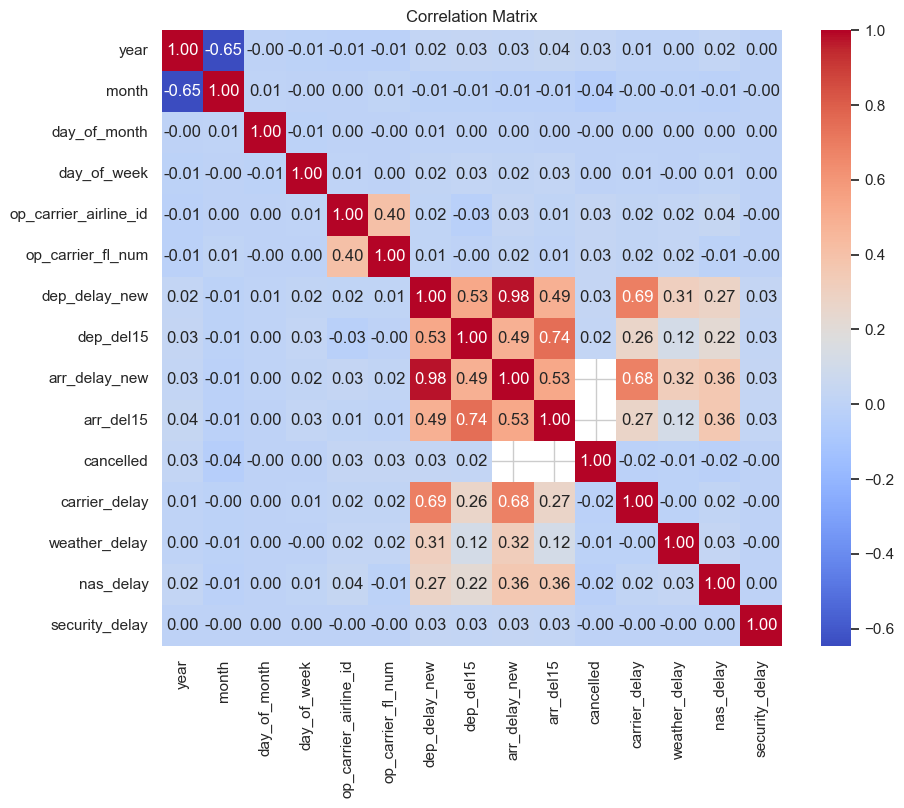

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df_airlines.select_dtypes(include="number").columns
corr = df_airlines[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

***Distribution of flight outcome***

How many flights are on time, delayed, or cancelled?

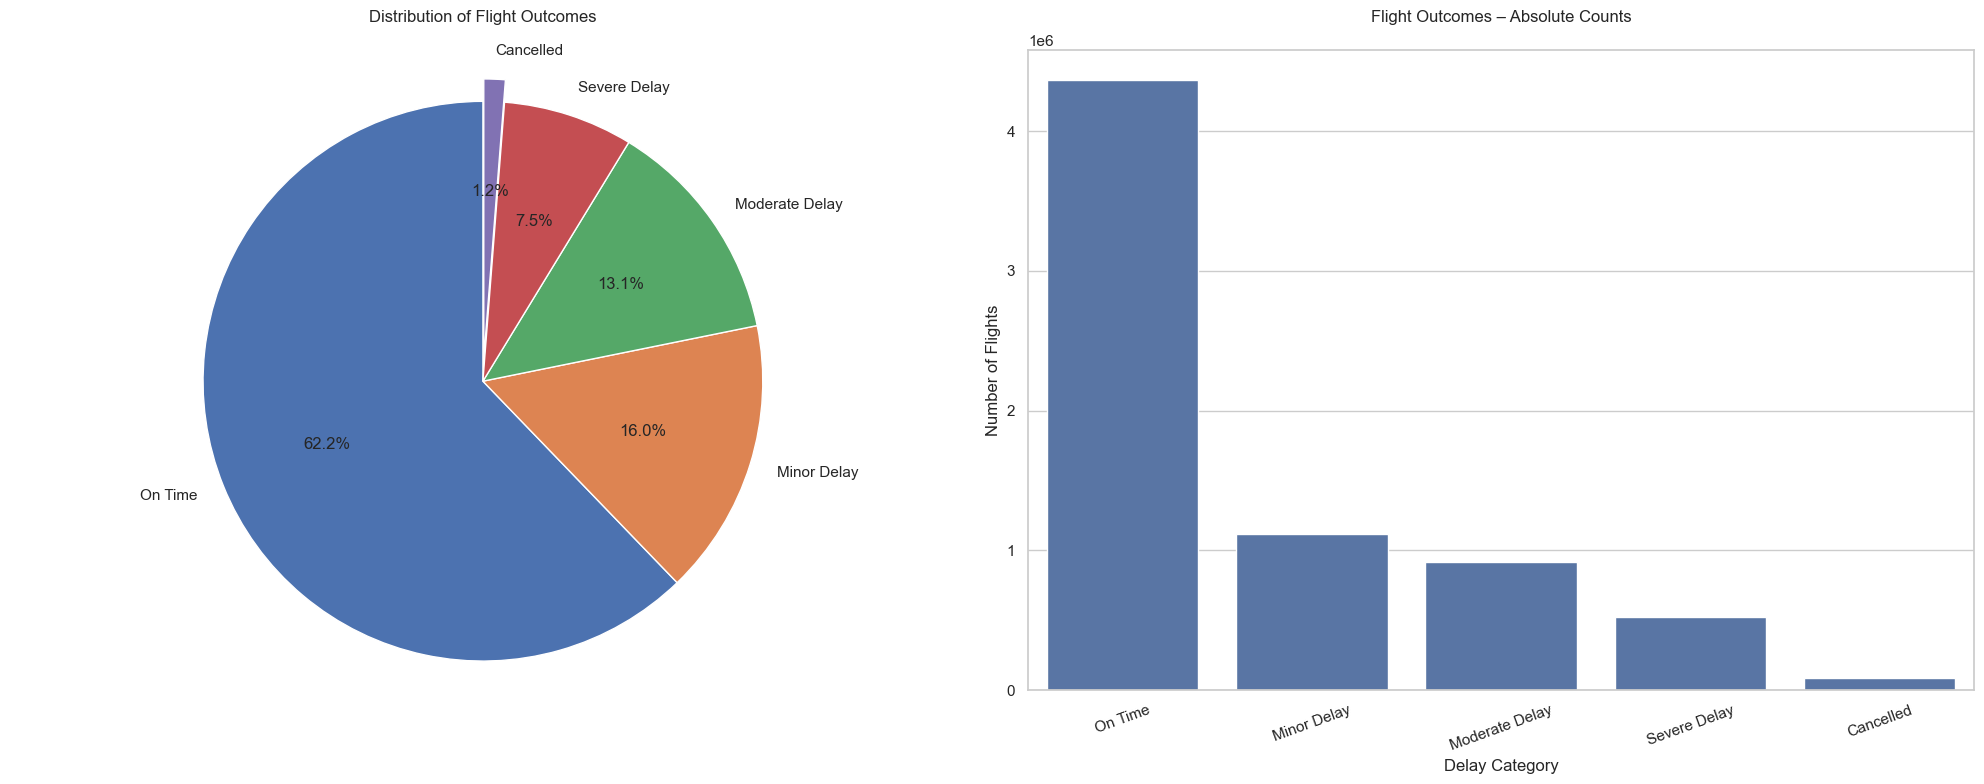

In [44]:
delay_order = ['On Time','Minor Delay','Moderate Delay','Severe Delay','Cancelled']

palette = sns.color_palette("tab10", n_colors=len(delay_order))
color_mapping = dict(zip(delay_order, palette))

f, ax = plt.subplots(1, 2, figsize=(20, 8))

delay_counts = (
    df_airlines['delay_category']
    .value_counts()
    .reindex(delay_order)
)

colors = [color_mapping[cat] for cat in delay_counts.index]

ax[0].pie(
    delay_counts,
    labels=delay_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0, 0, 0, 0.08]
)

ax[0].set_title('Distribution of Flight Outcomes', pad = 20)
ax[0].axis('equal')
ax[0].set_ylabel('')


sns.countplot(
    data=df_airlines,
    x='delay_category',
    order=delay_order,
    ax=ax[1]
)

ax[1].set_title('Flight Outcomes – Absolute Counts', pad = 20)
ax[1].set_xlabel('Delay Category')
ax[1].set_ylabel('Number of Flights')
ax[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


*Delay categories by seson*

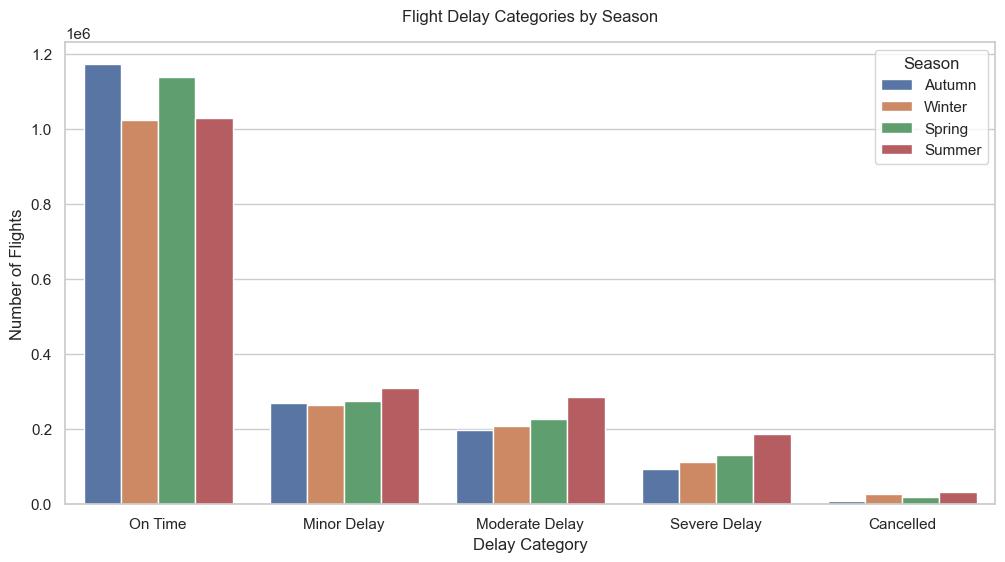

In [45]:
delay_order = ['On Time','Minor Delay','Moderate Delay','Severe Delay','Cancelled']

sns.countplot(
    data=df_airlines,
    x='delay_category',
    hue='season',
    order=delay_order
)

plt.title('Flight Delay Categories by Season', pad=15)
plt.xlabel('Delay Category')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.legend(title='Season')
plt.show()

*Cancellation rate by seson*

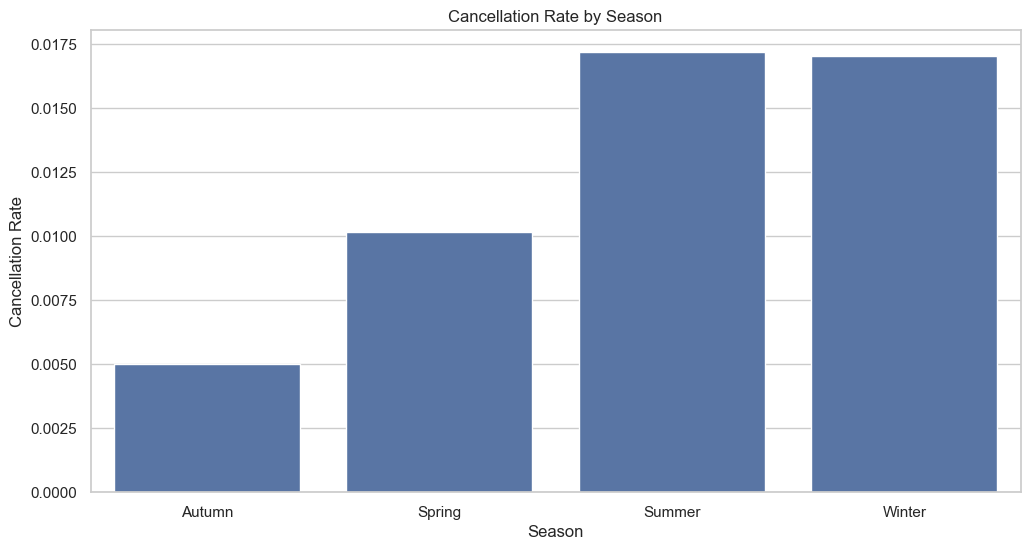

In [46]:
cancel_by_season = (
    df_airlines
    .groupby('season')['cancelled']
    .mean()
    .reset_index()
)

sns.barplot(
    data=cancel_by_season,
    x='season',
    y='cancelled'
)

plt.title('Cancellation Rate by Season')
plt.xlabel('Season')
plt.ylabel('Cancellation Rate')
plt.show()

*Cancellations due to*

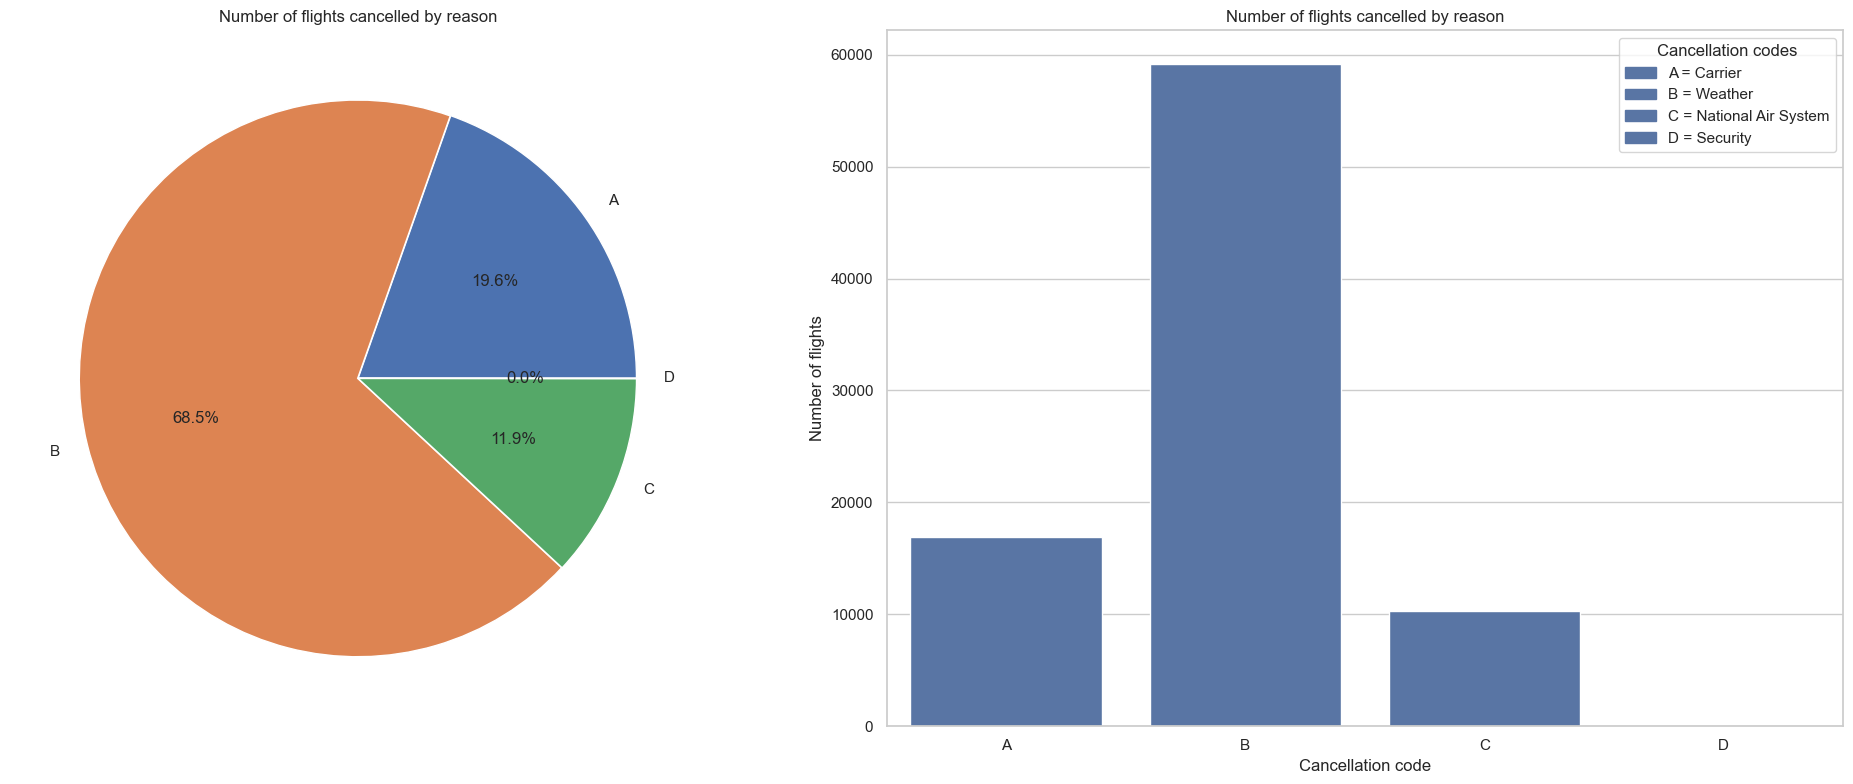

In [47]:
import matplotlib.patches as mpatches

cancelled_df = df_airlines[df_airlines['cancelled'] == 1]

cancel_by_code = (
    cancelled_df
    .groupby('cancellation_code')
    .size()
    .reset_index(name='num_flights')
)

f, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].pie(
    cancel_by_code['num_flights'], 
    labels=cancel_by_code['cancellation_code'], 
    explode=[0.001]*len(cancel_by_code), 
    autopct='%1.1f%%', 
    shadow=False
)
ax[0].set_title('Number of flights cancelled by reason')
ax[0].set_ylabel('')

sns.barplot(
    x='cancellation_code', 
    y='num_flights', 
    data=cancel_by_code, 
    ax=ax[1]
)
ax[1].set_title('Number of flights cancelled by reason')
ax[1].set_ylabel('Number of flights')
ax[1].set_xlabel('Cancellation code')

legend_labels = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

colors = [bar.get_facecolor() for bar in ax[1].patches]
patches = [mpatches.Patch(color=colors[i], label=f"{key} = {value}") 
           for i, (key, value) in enumerate(legend_labels.items())]
ax[1].legend(handles=patches, title='Cancellation codes')

plt.tight_layout()
plt.show()

*Cancellation rate by code by season:*

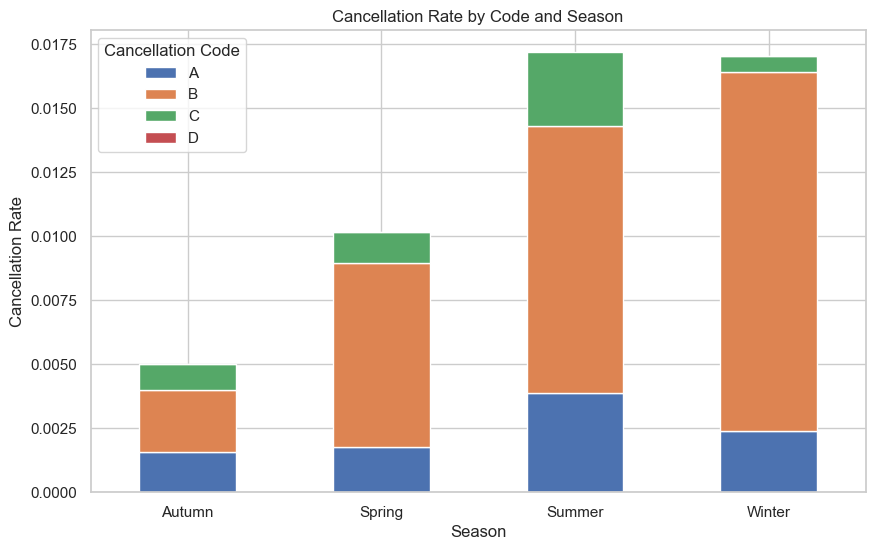

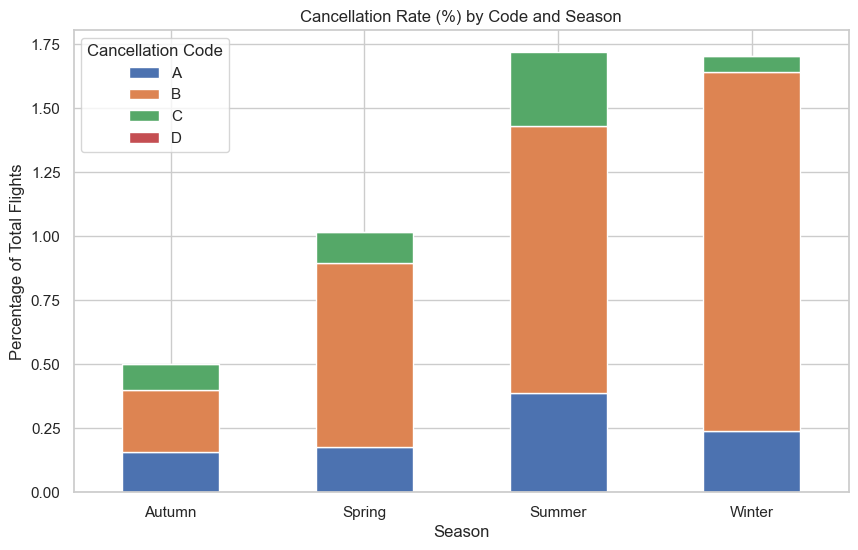

In [48]:
cancelled_df = df_airlines[df_airlines['cancelled'] == 1]

cancel_by_code_season = (
    cancelled_df
    .groupby(['season', 'cancellation_code'])
    .size()
    .reset_index(name='num_flights')
)

total_flights_season = df_airlines.groupby('season').size().reset_index(name='total_flights')
cancel_by_code_season = cancel_by_code_season.merge(total_flights_season, on='season')
cancel_by_code_season['rate'] = cancel_by_code_season['num_flights'] / cancel_by_code_season['total_flights']

cancel_pivot = cancel_by_code_season.pivot(index='season', columns='cancellation_code', values='rate').fillna(0)

cancel_pivot.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Cancellation Rate by Code and Season')
plt.xlabel('Season')
plt.ylabel('Cancellation Rate')
plt.legend(title='Cancellation Code')
plt.xticks(rotation=0)
plt.show()

cancel_pivot_percent = cancel_pivot.multiply(100)
cancel_pivot_percent.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Cancellation Rate (%) by Code and Season')
plt.xlabel('Season')
plt.ylabel('Percentage of Total Flights')
plt.legend(title='Cancellation Code')
plt.xticks(rotation=0)
plt.show()

***Temporal performance analysis***

*Average departure delay by day of week*

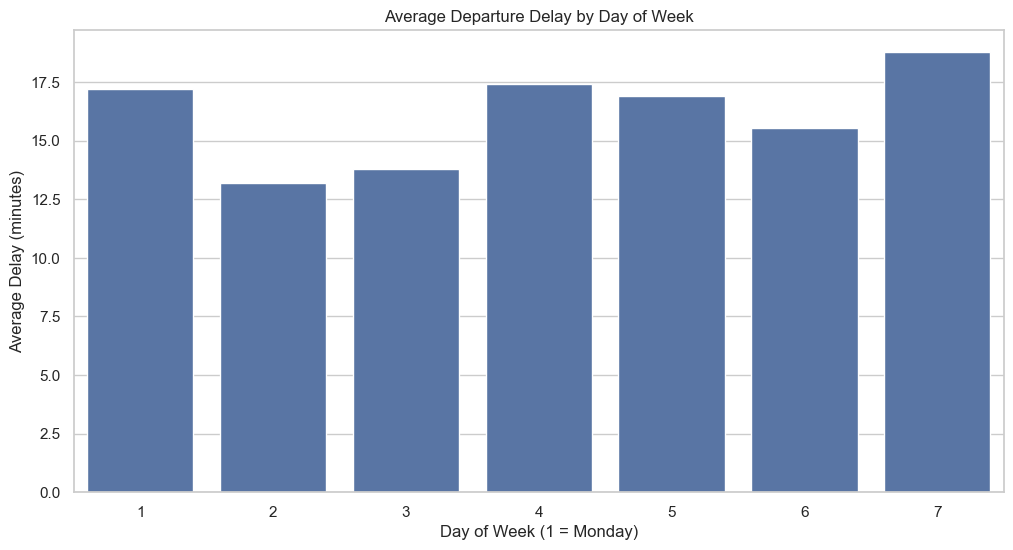

In [49]:
dep_delay_day = (
    df_airlines
    .groupby('day_of_week')['dep_delay_new']
    .mean()
    .reset_index()
)

sns.barplot(
    data=dep_delay_day,
    x='day_of_week',
    y='dep_delay_new'
)

plt.title('Average Departure Delay by Day of Week')
plt.xlabel('Day of Week (1 = Monday)')
plt.ylabel('Average Delay (minutes)')
plt.show()

*Average delay by time of day (dep_bin)*

/var/folders/lr/d46q9z0s2zndy_5npx2_zwq00000gn/T/ipykernel_2559/2888131809.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('dep_bin')['dep_delay_new']


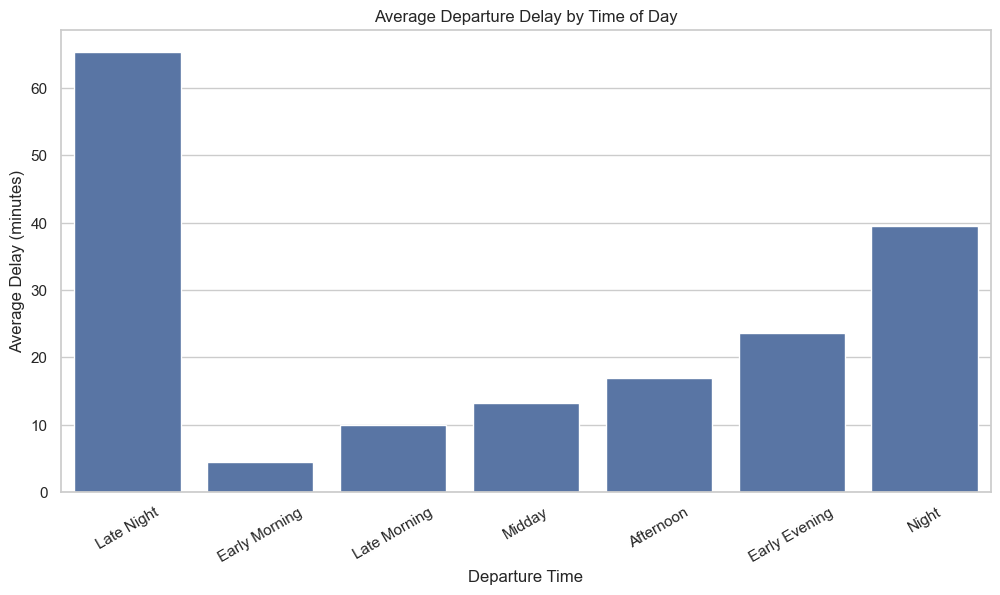

In [50]:
dep_bin_order = [
    'Late Night','Early Morning','Late Morning',
    'Midday','Afternoon','Early Evening','Night'
]

df_airlines['dep_bin'] = pd.Categorical(
    df_airlines['dep_bin'],
    categories=dep_bin_order,
    ordered=True
)

dep_delay_bin = (
    df_airlines
    .groupby('dep_bin')['dep_delay_new']
    .mean()
    .reset_index()
)

sns.barplot(
    data=dep_delay_bin,
    x='dep_bin',
    y='dep_delay_new'
)

plt.title('Average Departure Delay by Time of Day')
plt.xlabel('Departure Time')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=30)
plt.show()

*Seasonality heatmap*

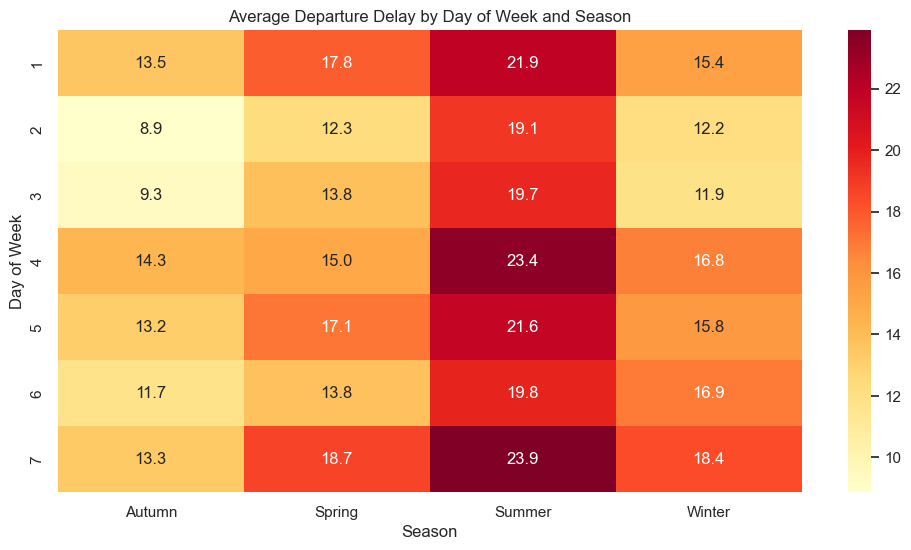

In [51]:
heatmap_day_season = (
    df_airlines
    .groupby(['day_of_week', 'season'])['dep_delay_new']
    .mean()
    .unstack()
)

sns.heatmap(
    heatmap_day_season,
    annot=True,
    fmt=".1f",
    cmap='YlOrRd'
)

plt.title('Average Departure Delay by Day of Week and Season')
plt.xlabel('Season')
plt.ylabel('Day of Week')
plt.show()

*Heatmap of average delays by day of the week and time slot*

/var/folders/lr/d46q9z0s2zndy_5npx2_zwq00000gn/T/ipykernel_2559/2099376683.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_airlines.groupby(['day_of_week','dep_bin'])['dep_delay_new'].mean().unstack()


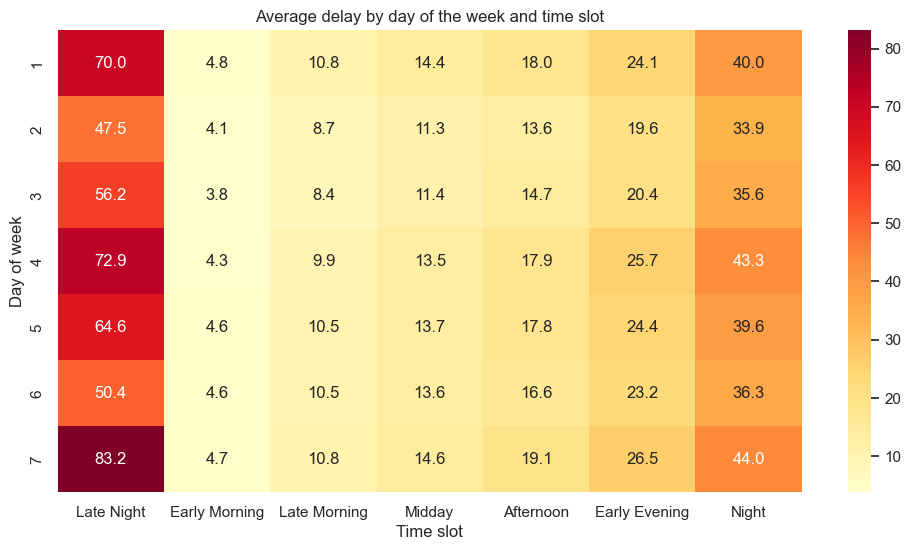

In [52]:
heatmap_data = df_airlines.groupby(['day_of_week','dep_bin'])['dep_delay_new'].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Average delay by day of the week and time slot')
plt.ylabel('Day of week')
plt.xlabel('Time slot')
plt.show()

*Daily Average Departure Delay Calendar (Nov 2024 – Oct 2025)*

In [53]:
df_airlines['fl_date'] = pd.to_datetime({
    'year': df_airlines['year'],
    'month': df_airlines['month'],
    'day': df_airlines['day_of_month']
})

/var/folders/lr/d46q9z0s2zndy_5npx2_zwq00000gn/T/ipykernel_2559/3369246048.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


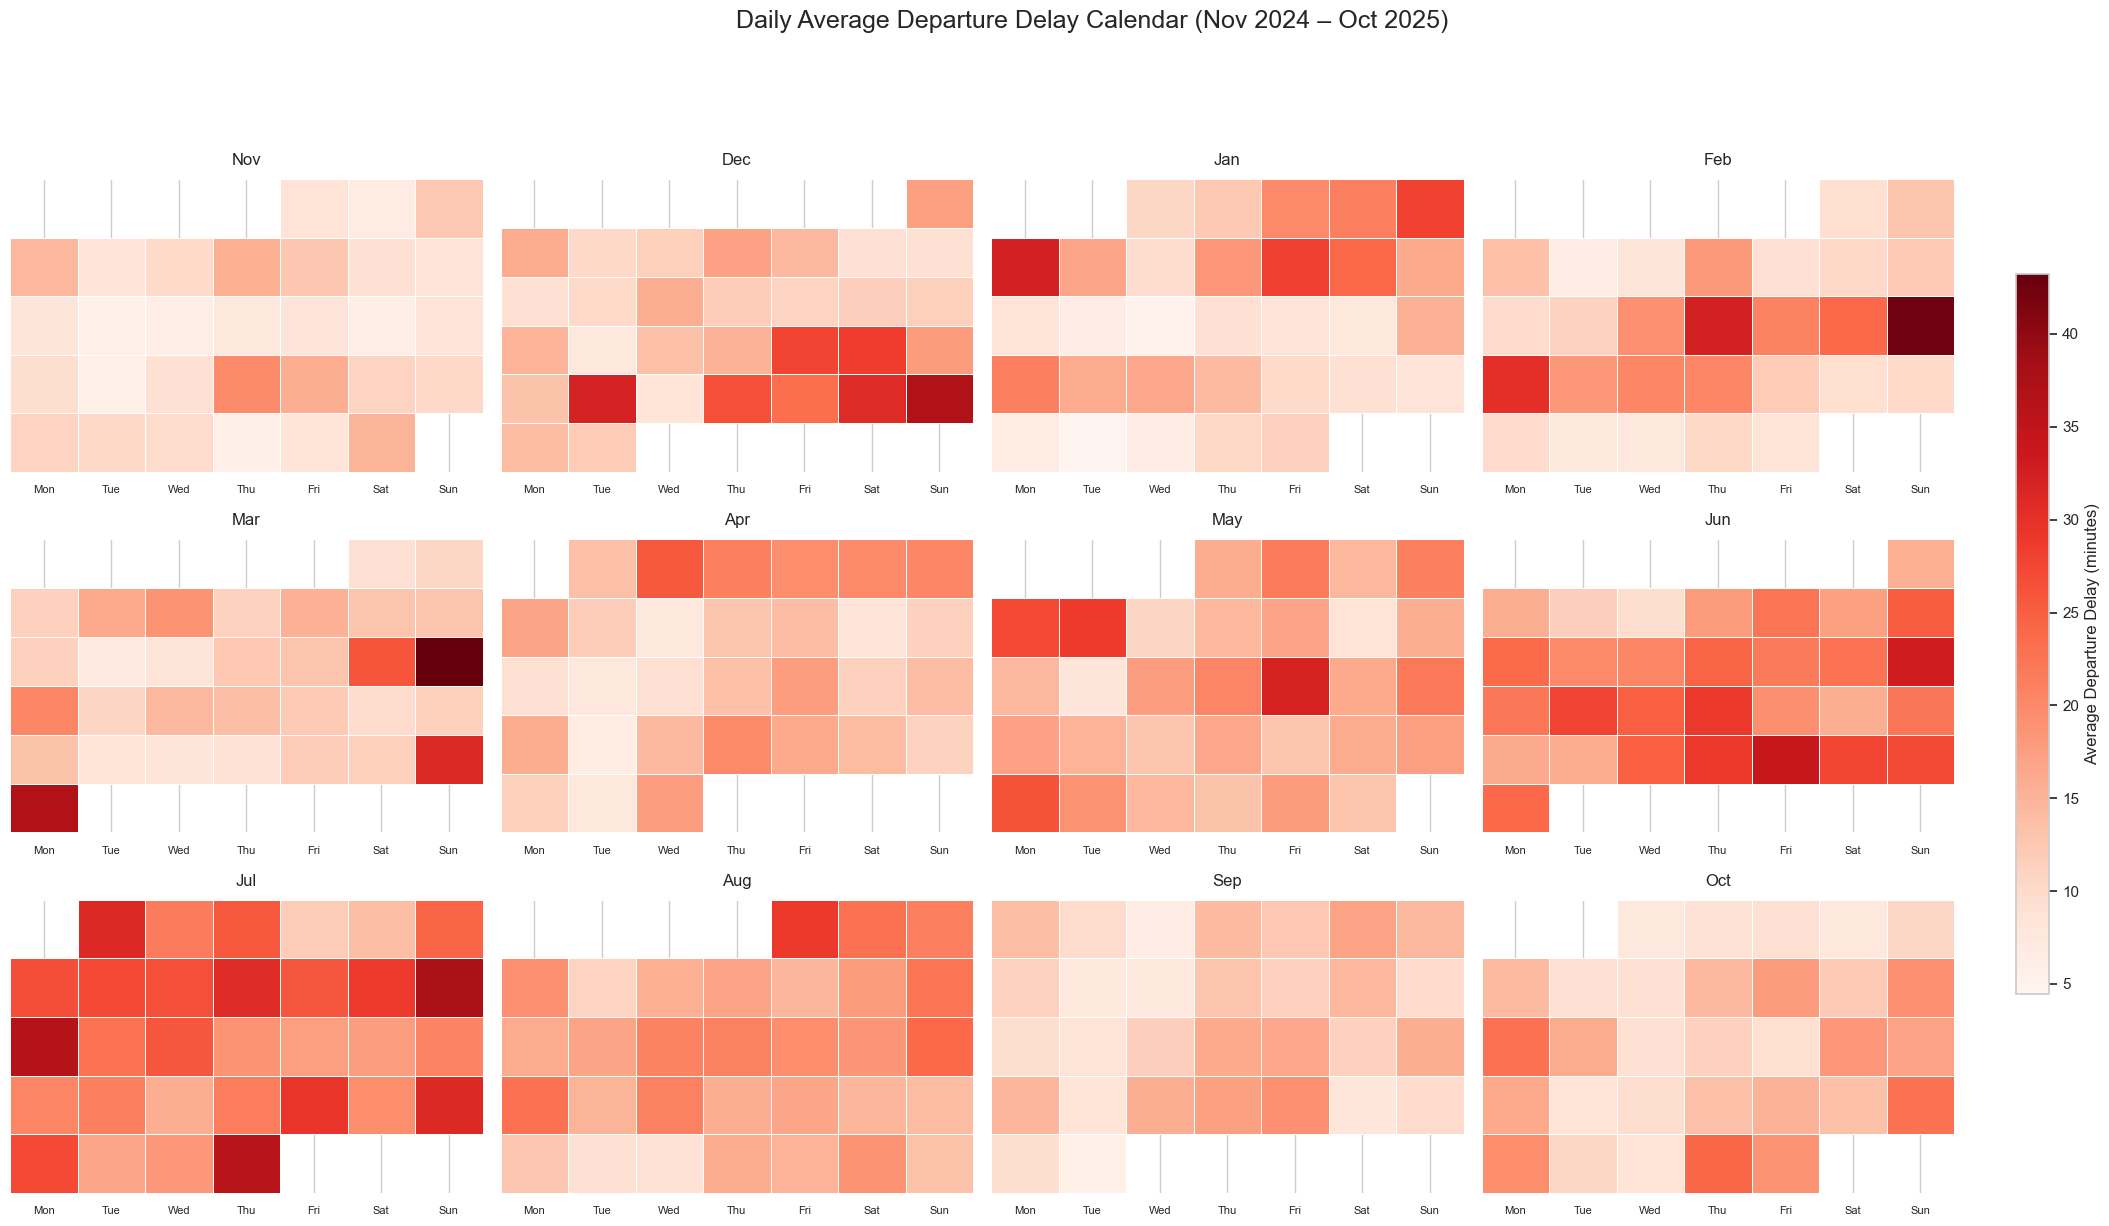

In [55]:
import calendar

df_daily = (
    df_airlines[df_airlines['cancelled'] == 0]
    .groupby('fl_date')['dep_delay_new']
    .mean()
    .reset_index()
)

df_daily.rename(columns={'dep_delay_new': 'avg_dep_delay'}, inplace=True)

start_date = '2024-11-01'
end_date = '2025-10-31'

df_daily = df_daily[
    (df_daily['fl_date'] >= start_date) &
    (df_daily['fl_date'] <= end_date)
]

df_daily['year'] = df_daily['fl_date'].dt.year
df_daily['month'] = df_daily['fl_date'].dt.month
df_daily['day'] = df_daily['fl_date'].dt.day

def plot_calendar_month(df, year, month, ax, vmin=None, vmax=None):
    cal = calendar.monthcalendar(year, month)
    heatmap = np.full((len(cal), 7), np.nan)

    df_month = df[(df['year'] == year) & (df['month'] == month)]

    for i, week in enumerate(cal):
        for j, day in enumerate(week):
            if day != 0:
                value = df_month[df_month['day'] == day]['avg_dep_delay']
                if not value.empty:
                    heatmap[i, j] = value.values[0]

    sns.heatmap(
        heatmap,
        ax=ax,
        cmap='Reds',
        vmin=vmin,
        vmax=vmax,
        cbar=False,
        linewidths=0.5,
        annot=False
    )

    ax.set_title(calendar.month_abbr[month], fontsize=12, pad=10)
    ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=8)
    ax.set_yticks([])
    ax.tick_params(left=False)

months = [
    (2024, 11), (2024, 12),
    (2025, 1), (2025, 2), (2025, 3), (2025, 4),
    (2025, 5), (2025, 6), (2025, 7), (2025, 8),
    (2025, 9), (2025, 10)
]

vmin = df_daily['avg_dep_delay'].min()
vmax = df_daily['avg_dep_delay'].max()

fig, axes = plt.subplots(3, 4, figsize=(22, 12))
axes = axes.flatten()

for ax, (year, month) in zip(axes, months):
    plot_calendar_month(df_daily, year, month, ax, vmin, vmax)

# Colorbar global
cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap='Reds')
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label='Average Departure Delay (minutes)')

fig.suptitle(
    'Daily Average Departure Delay Calendar (Nov 2024 – Oct 2025)',
    fontsize=18,
    y=1.02
)

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

A calendar heatmap was built to visualize daily average departure delays over a full operational year (November 2024 – October 2025). This representation allows the identification of temporal patterns, operational disruptions, and clusters of high-delay days that are not visible in aggregated monthly or seasonal analyses.

***Airline performance benchmarking***

*Average departure delay by airline*

/var/folders/lr/d46q9z0s2zndy_5npx2_zwq00000gn/T/ipykernel_2559/4154865101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dep_delay_by_carrier.index, y=dep_delay_by_carrier.values, palette='Blues_r')


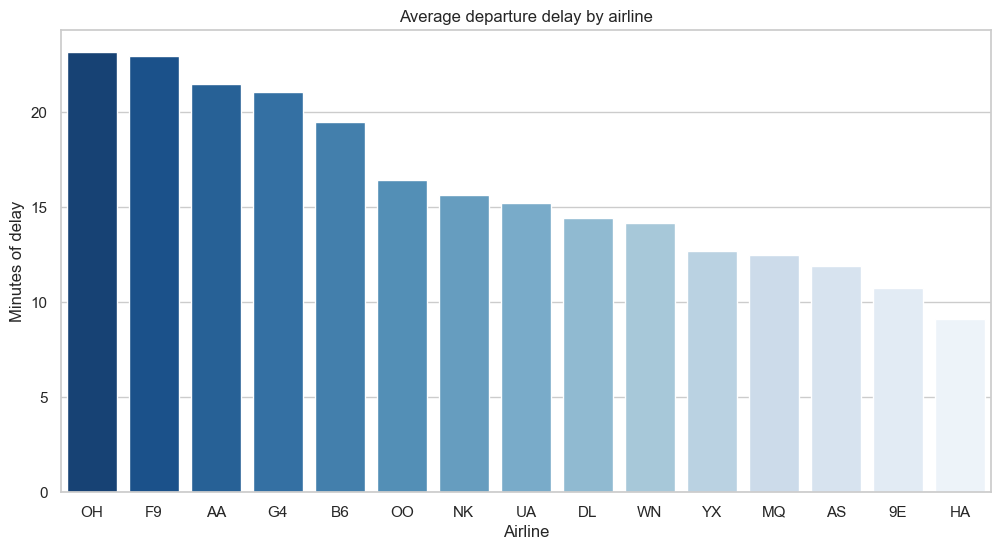

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x=dep_delay_by_carrier.index, y=dep_delay_by_carrier.values, palette='Blues_r')
plt.title('Average departure delay by airline')
plt.ylabel('Minutes of delay')
plt.xlabel('Airline')
plt.show()

Airlines: 

- OH: PSA Airlines Inc.
- F9: Frontier Airlines Inc.
- AA: American Airlines Inc.
- G4: Allegiant Air
- B6: JetBlue Airways
- OO: SkyWest Airlines Inc.
- NK: Spirit Air Lines
- UA: United Air Lines Inc.
- DL: Delta Air Lines Inc.
- WN: Southwest Airlines Co.
- YX: Republic Airline
- MQ: Envoy Air
- AS: Alaska Airlines Inc.
- 9E: Endeavor Air Inc.
- HA: Hawaiian Airlines Inc.

*Delay category composition by airline*

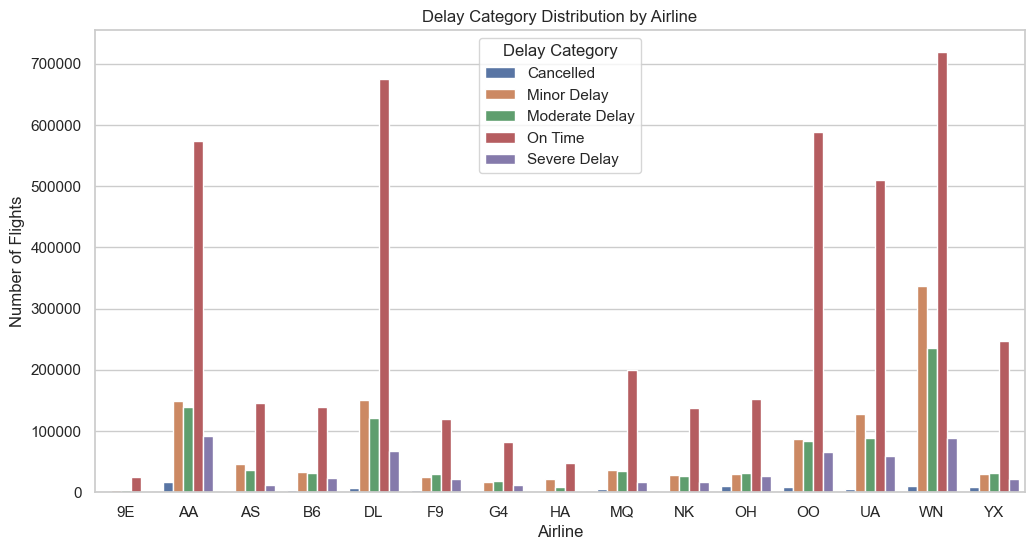

In [57]:
airline_delay_cat = (
    df_airlines
    .groupby(['op_unique_carrier', 'delay_category'])
    .size()
    .reset_index(name='count')
)

sns.barplot(
    data=airline_delay_cat,
    x='op_unique_carrier',
    y='count',
    hue='delay_category'
)

plt.title('Delay Category Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.legend(title='Delay Category')
plt.show()

***Airport & route-level insights***

*Top origin airports by average delay*

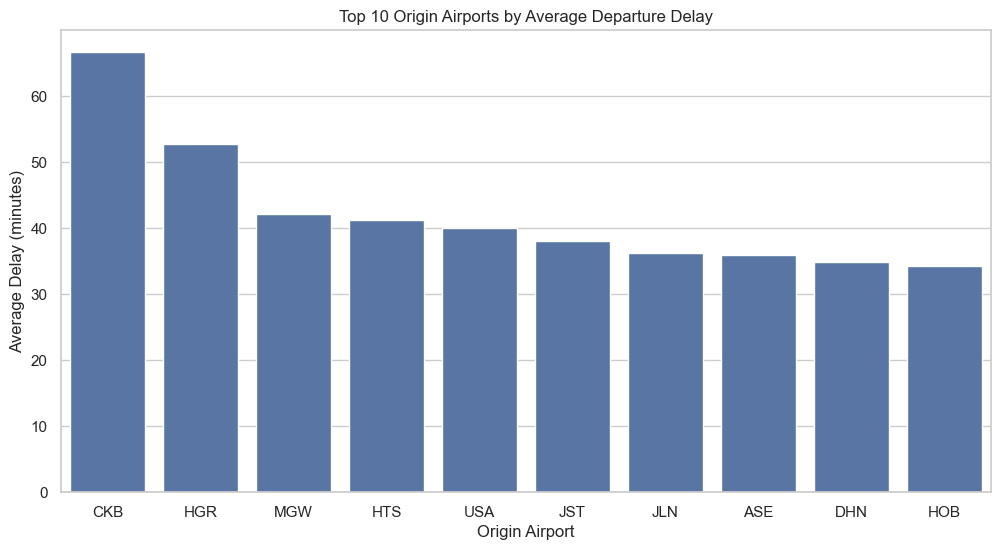

In [58]:
top_origins = (
    df_airlines
    .groupby('origin')['dep_delay_new']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(
    data=top_origins,
    x='origin',
    y='dep_delay_new'
)

plt.title('Top 10 Origin Airports by Average Departure Delay')
plt.xlabel('Origin Airport')
plt.ylabel('Average Delay (minutes)')
plt.show()

*Top destination airports by average delay*

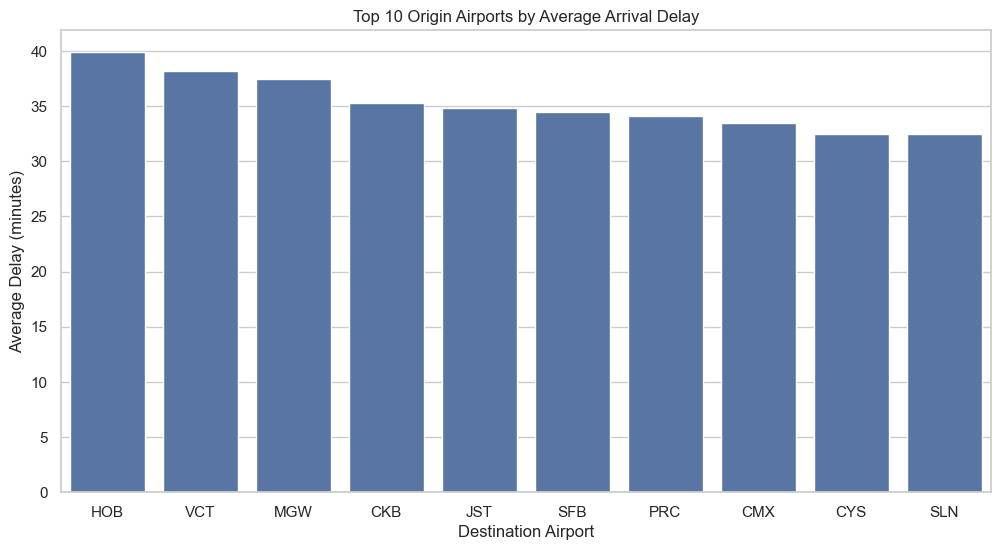

In [59]:
top_origins = (
    df_airlines
    .groupby('dest')['arr_delay_new']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

sns.barplot(
    data=top_origins,
    x='dest',
    y='arr_delay_new'
)

plt.title('Top 10 Origin Airports by Average Arrival Delay')
plt.xlabel('Destination Airport')
plt.ylabel('Average Delay (minutes)')
plt.show()

*Delay distribution at major airports (boxplot)*

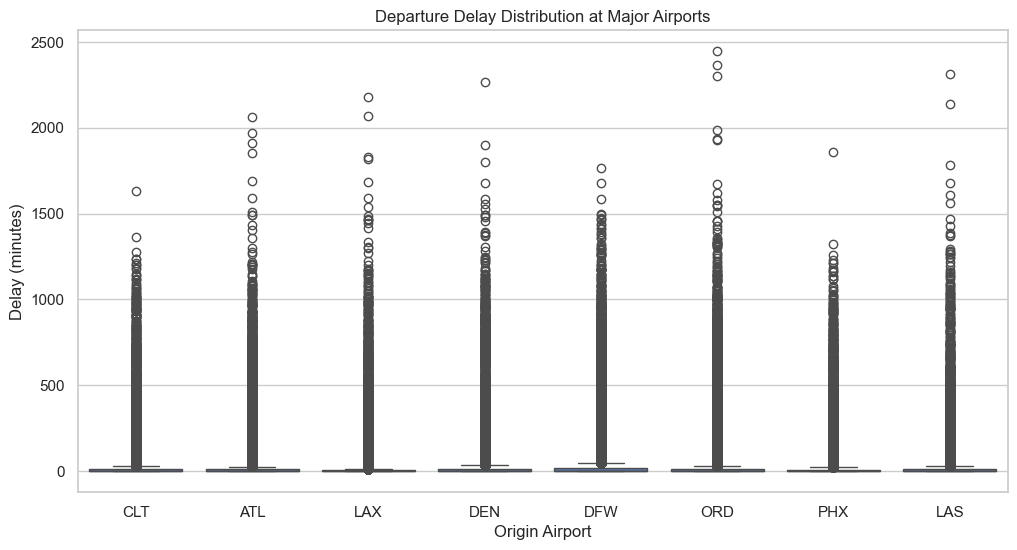

In [60]:
major_airports = df_airlines['origin'].value_counts().head(8).index

sns.boxplot(
    data=df_airlines[df_airlines['origin'].isin(major_airports)],
    x='origin',
    y='dep_delay_new'
)

plt.title('Departure Delay Distribution at Major Airports')
plt.xlabel('Origin Airport')
plt.ylabel('Delay (minutes)')
plt.show()

***Delay causes analysis***

*Delays due to cause in stacked bar*

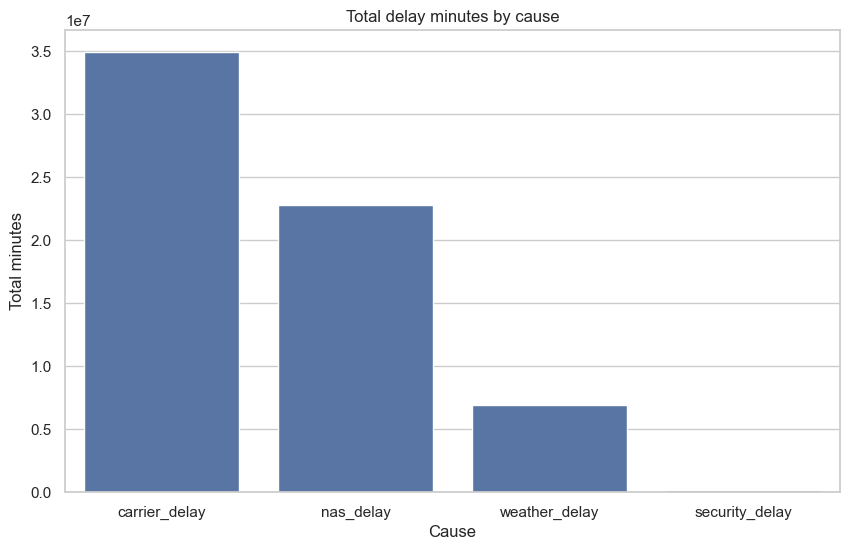

In [61]:
cause_cols = ['carrier_delay','weather_delay','nas_delay','security_delay']
cause_data = df_airlines[cause_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=cause_data.index, y=cause_data.values)
plt.title('Total delay minutes by cause')
plt.ylabel('Total minutes')
plt.xlabel('Cause')
plt.show()

***Departure vs arrival Delays***

*Scatter: Departure and arrival delays*

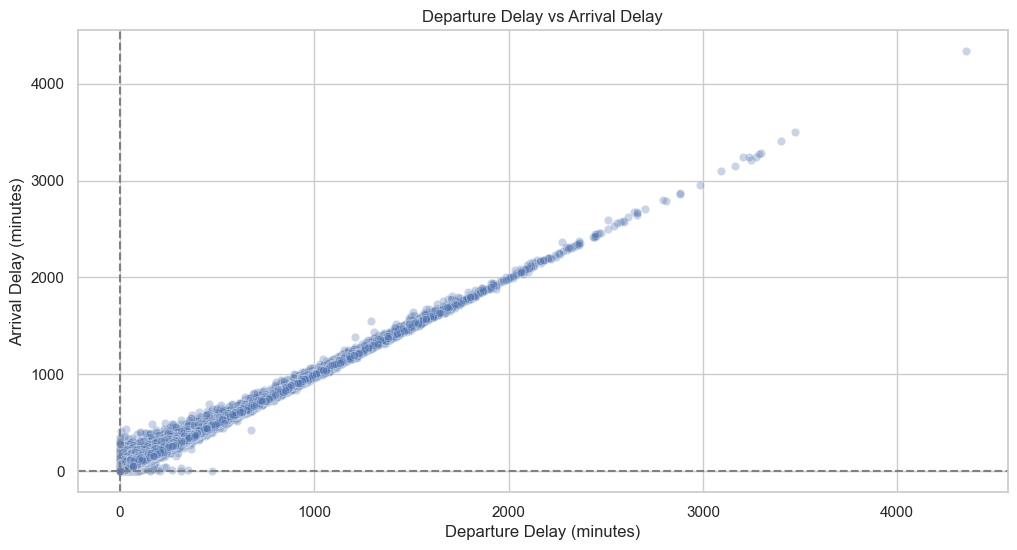

In [62]:
sns.scatterplot(
    data=df_airlines,
    x='dep_delay_new',
    y='arr_delay_new',
    alpha=0.3
)

plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')

plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

*Extra:*

*Histogram of arrivals delays*

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_airlines['arr_delay_new'], bins=50, kde=True, color='salmon')
plt.title('Distribution of arrivals delays')
plt.xlabel('Minutes of delay')
plt.ylabel('Number of flights')
plt.show()

*Histogram of departure delays*

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_airlines['dep_delay_new'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of departure delays')
plt.xlabel('Minutes of delay')
plt.ylabel('Number of flights')
plt.show()

In [ ]:
# df_airlines.to_csv("ontime_2025.csv", index=False, encoding='utf-8')